In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project_data.csv')
games.drop(["Unnamed: 0"], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [9]:
#결측값 처리
games = games.dropna(axis=0)

def set_year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

games['Year'] = games['Year'].apply(set_year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [10]:
num_platform = len(games['Platform'].unique())
num_genre = len(games['Genre'].unique())
num_year = len(games['Year'].unique())
num_publisher = len(games['Publisher'].unique())

num_platform, num_genre, num_year, num_publisher
#(31, 12, 39, 575)

(31, 12, 39, 575)

In [11]:
#매출 int로
def del_str(num) :
  if 'M' in num :
    num = num.replace('M','')
  elif 'K' in num :
    num = num.replace('K','')
    num = float(num) * 0.001
  return pd.to_numeric(num)

games['NA_Sales'] = games['NA_Sales'].apply(del_str)
games['EU_Sales'] = games['EU_Sales'].apply(del_str)
games['JP_Sales'] = games['JP_Sales'].apply(del_str)
games['Other_Sales'] = games['Other_Sales'].apply(del_str) 
games['Global_Sales'] = games.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1)

In [12]:
games.info()
games.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16241 non-null  int64  
 1   Name          16241 non-null  object 
 2   Platform      16241 non-null  object 
 3   Year          16241 non-null  int64  
 4   Genre         16241 non-null  object 
 5   Publisher     16241 non-null  object 
 6   NA_Sales      16241 non-null  float64
 7   EU_Sales      16241 non-null  float64
 8   JP_Sales      16241 non-null  float64
 9   Other_Sales   16241 non-null  float64
 10  Global_Sales  16241 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
num_platform = len(games['Platform'].unique())
num_genre = len(games['Genre'].unique())
num_year = len(games['Year'].unique())
num_publisher = len(games['Publisher'].unique())

num_platform, num_genre, num_year, num_publisher
#(31, 12, 39, 575)

(31, 12, 39, 575)

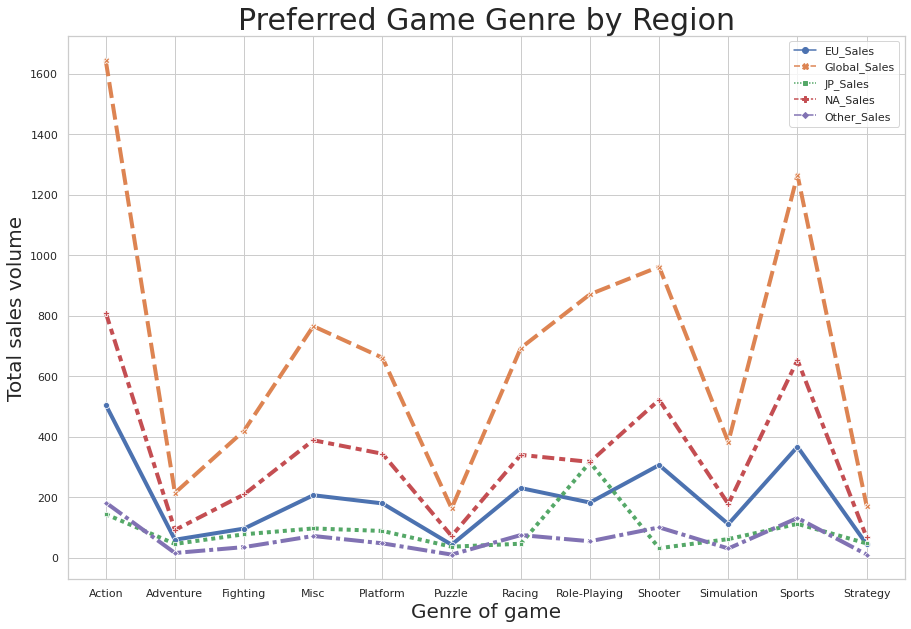

In [26]:
#1. 지역별 선호하는 게임 장르(line)
games_genre = games.groupby(by=['Genre'])['Global_Sales'].sum()
games_genre = games_genre.reset_index()

games_genre_na = games.groupby(by=['Genre'])['NA_Sales'].sum()
games_genre_na = games_genre_na.reset_index()

games_genre_eu = games.groupby(by=['Genre'])['EU_Sales'].sum()
games_genre_eu = games_genre_eu.reset_index()

games_genre_jp = games.groupby(by=['Genre'])['JP_Sales'].sum()
games_genre_jp = games_genre_jp.reset_index()

games_genre_ot = games.groupby(by=['Genre'])['Other_Sales'].sum()
games_genre_ot = games_genre_ot.reset_index()

games_genre = games_genre.combine_first(games_genre_na).combine_first(games_genre_eu).combine_first(games_genre_jp).combine_first(games_genre_ot)
games_genre = games_genre.set_index("Genre")

sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Region", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=games_genre, markers=True, linewidth=4)


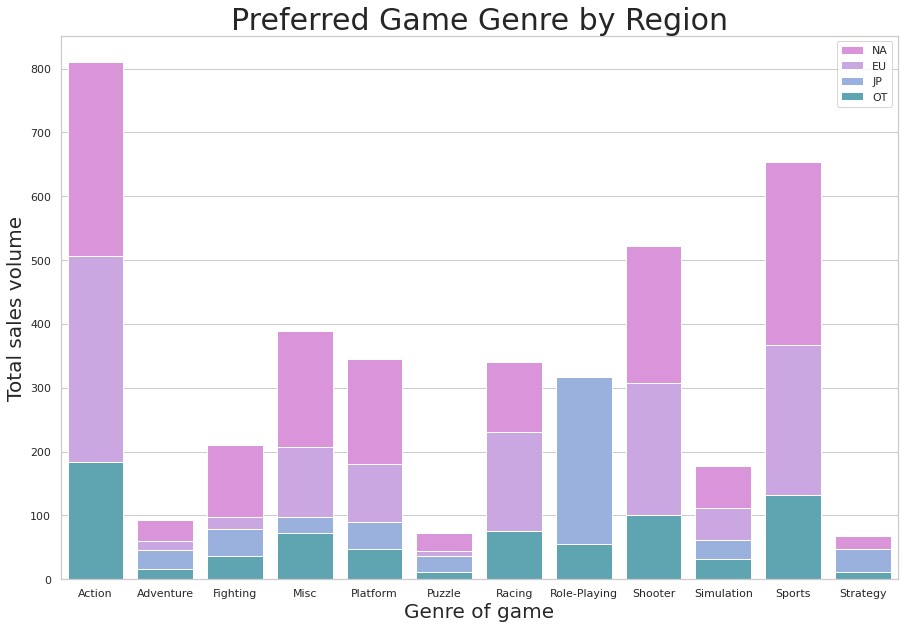

In [27]:
#지역별 장르 구분(bar)
byReg = games.groupby(['Genre']).sum()
byReg = byReg[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
byReg = byReg.reset_index()

plt.figure(figsize=(15, 10))
s1 = sns.barplot(x = 'Genre', y = 'NA_Sales', data = byReg, color = '#e688e6', label ='NA')
s2 = sns.barplot(x = 'Genre', y = 'EU_Sales', data = byReg, color = '#cc9ee9', label ='EU')
s3 = sns.barplot(x = 'Genre', y = 'JP_Sales', data = byReg, color = '#8eaee7', label ='JP')
s4 = sns.barplot(x = 'Genre', y = 'Other_Sales', data = byReg, color = '#50adbf', label ='OT')

plt.title("Preferred Game Genre by Region", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)
plt.legend()


In [16]:
#ANOVA 검정
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

"""
1.지역에 따라서 선호하는 게임 장르가 다를까(ANOVA분석)
귀무가설 : 지역에 따른 게임 판매량은 차이가 없다.
대립가설 : 지역에 따른 게임 판매량에는 차이가 있다. 
"""

F_statistic, pVal = stats.f_oneway(games['NA_Sales'], games['EU_Sales'], games['JP_Sales'],games['Other_Sales'])
print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
#p값이 0.05보다 작기 때문에 귀무가설은 기각된다

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


데이터의 일원분산분석 결과 : F=565.5, p=0.00000


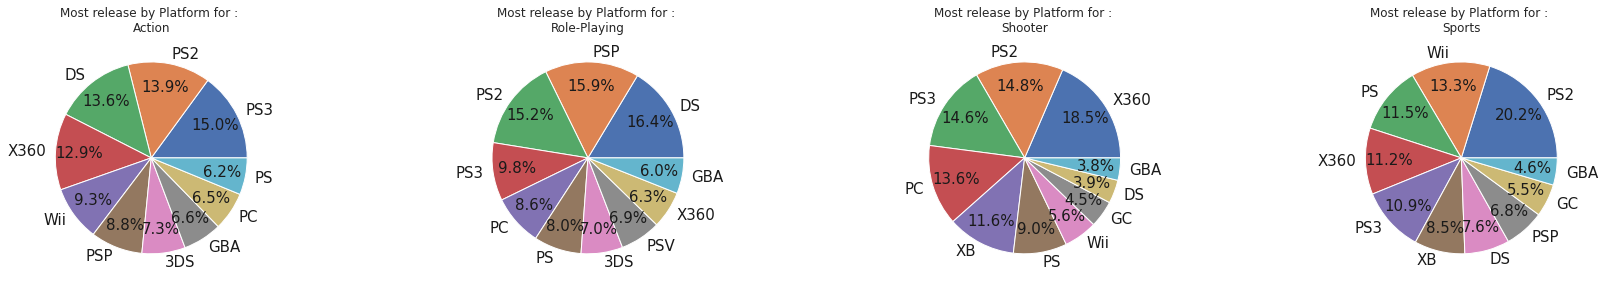

In [17]:
#장르별 출시 플랫폼
Major_Genre=['Action','Role-Playing','Shooter','Sports']

byGenre=games.groupby(['Genre','Platform'])['Name'].count()
byGenre=pd.DataFrame(byGenre)
byGenre.head()
byGenre.reset_index(level=0).head()

byPlatform=games.groupby(['Genre','Platform'])['Name'].count()
plt.figure(figsize=(30,15))
for i,genre,j in zip(itertools.product(range(3),range(4)),Major_Genre ,range(4)):
    genre=byGenre.xs(genre).nlargest(columns='Name',n=10)
    ax1=plt.subplot2grid((3,4),(i))
    ax1.pie(genre['Name'],autopct='%1.1f%%',labels=genre.index,textprops=dict(fontsize=15,color='k'),pctdistance=0.75)
    plt.title('Most release by Platform for : \n' +Major_Genre[j])

In [ ]:
#2. 연도별 게임 트렌드
year_genre = games.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_genre_t = year_genre.groupby(by=['Year'])['Global_Sales'].transform(max) == year_genre['Global_Sales']
year_genre_max = year_genre[year_genre_t].reset_index(drop=True)

genre = year_genre_max['Genre']

plt.figure(figsize=(30, 20))
g = sns.barplot(x='Year', y='Global_Sales', data=year_genre_max)
index = 0

for value in year_genre_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()

In [33]:
# #최근 10년간 매출 1위 장르
# year_genre_max['Genre'].value_counts()
# recent_genre = year_genre_max.sort_values(['Year'], ascending=False)[:10]
# #액션이 강함


# 최근 10년간 매출 상위  게임
year_sales_top_game = games[games.Year >= 2011].sort_values('Global_Sales', ascending=False).head(10)
year_sales_top_game = year_sales_top_game.reset_index(drop=True)
year_sales_top_game.drop(["Unnamed: 0"], axis=1, inplace=True)
#시리즈물이 강함

year_sales_top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
5,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
6,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
7,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
8,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33


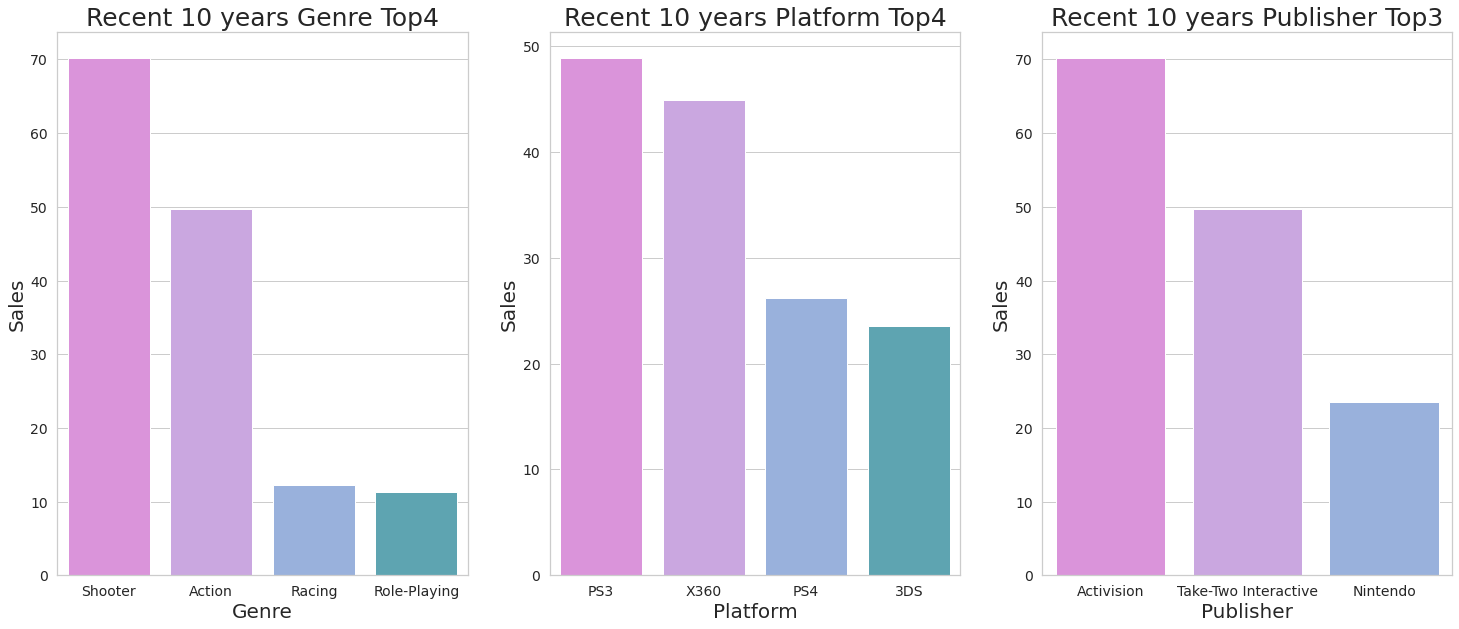

In [70]:
# 최근 10년간 장르별, 플랫폼 순위
def recent_year_Top4_sales(df, col, sales):
    return df.groupby(col)[sales].sum().reset_index(name='sales').sort_values('sales', ascending=False).head(4)

# 최근 10년 기업별 판매량 Top4
publisher_sales_top3 = recent_year_Top4_sales(year_sales_top_game, 'Publisher', 'Global_Sales')
# 최근 10년 플랫폼 판매량 Top4
platform_sales_top4 = recent_year_Top4_sales(year_sales_top_game, 'Platform', 'Global_Sales')
# 최근 10년 장르 판매량 Top4
genre_sales_top4 = recent_year_Top4_sales(year_sales_top_game, 'Genre', 'Global_Sales')

data_list = [genre_sales_top4, platform_sales_top4, publisher_sales_top3]
titles = ['Recent 10 years Genre Top4', 'Recent 10 years Platform Top4', 'Recent 10 years Publisher Top3']
x_labels = ['Genre','Platform', 'Publisher']

colors = ['#e688e6','#cc9ee9','#8eaee7','#50adbf']
sns.set_palette(colors)

fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=3)
for i, data, title in zip(range(5), data_list, titles):
    sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i])
    axs[i].set_title(titles[i], fontsize=25)
    axs[i].tick_params(labelsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=20)
    axs[i].set_ylabel('Sales', fontsize=20)
plt.show()

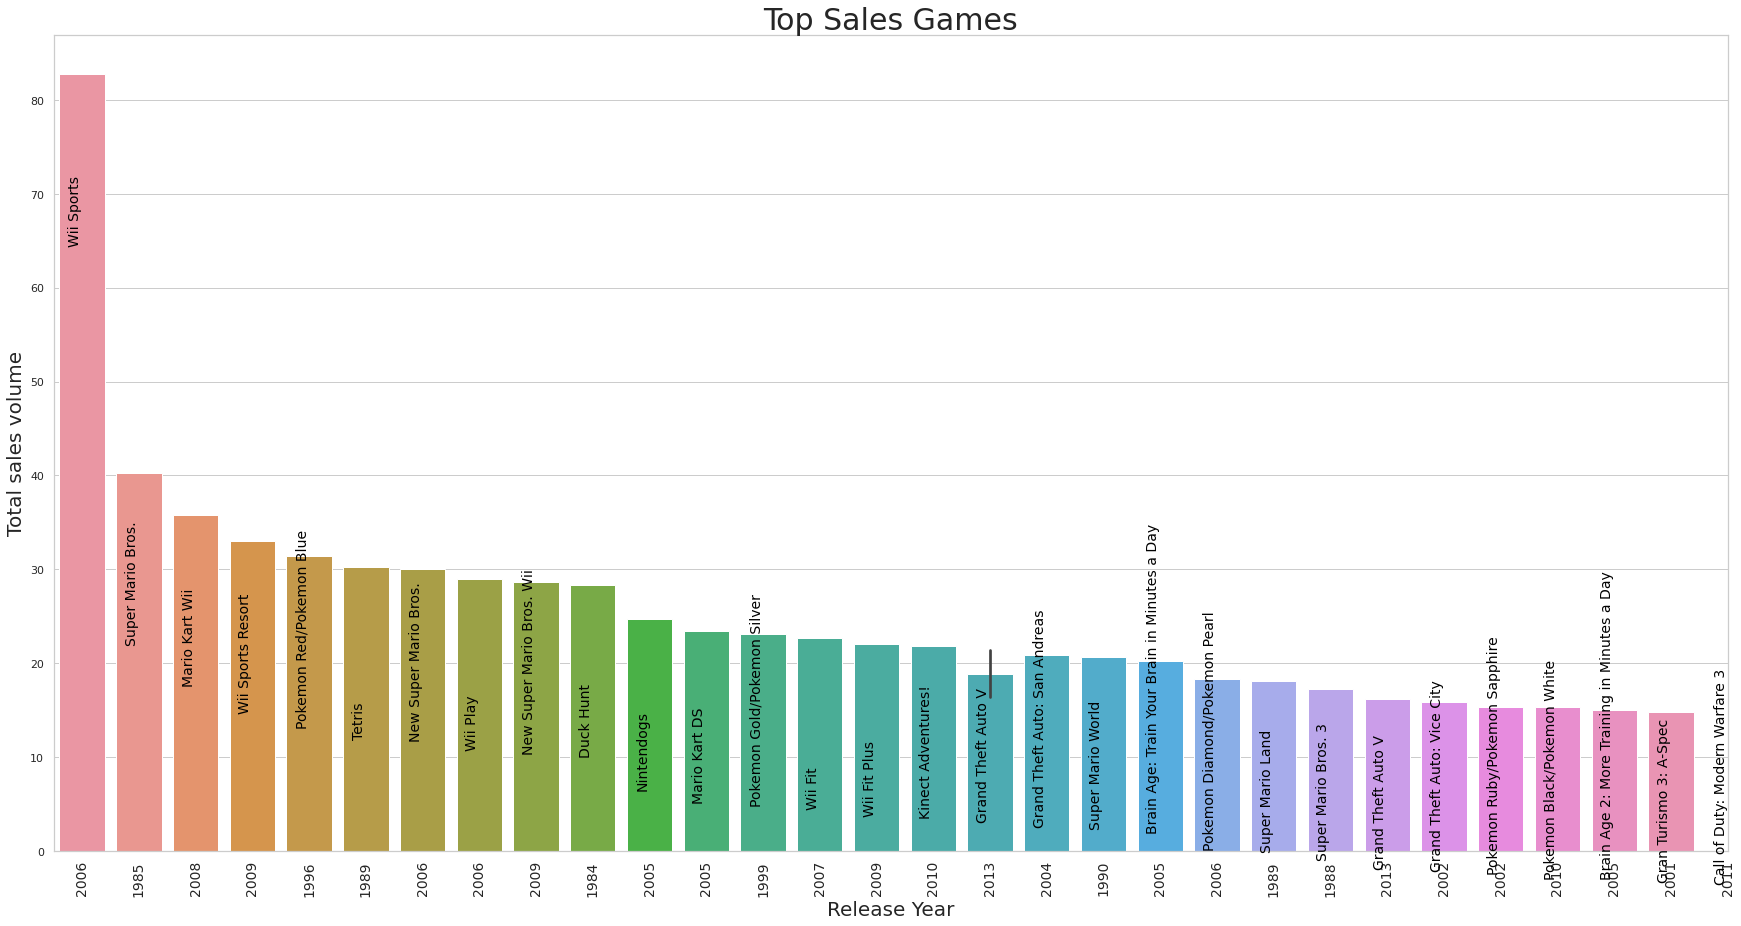

'\nwii가 강세\n'

In [19]:
#3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스
top_games = games.sort_values(by=['Global_Sales'], axis=0, ascending=False)[:30]
top_games = top_games[['Name','Platform','Year','Genre','Global_Sales']].reset_index(drop=True)

name = top_games['Name']
year = top_games['Year']
genre = top_games['Genre']
sales = top_games['Global_Sales']
y = np.arange(0, 30)

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Name', y='Global_Sales', data=top_games)
index = 0

for value in top_games['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="right")
    index += 1

plt.xticks(y, top_games['Year'], fontsize=14, rotation=90)
plt.title("Top Sales Games", fontsize=30)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.show()

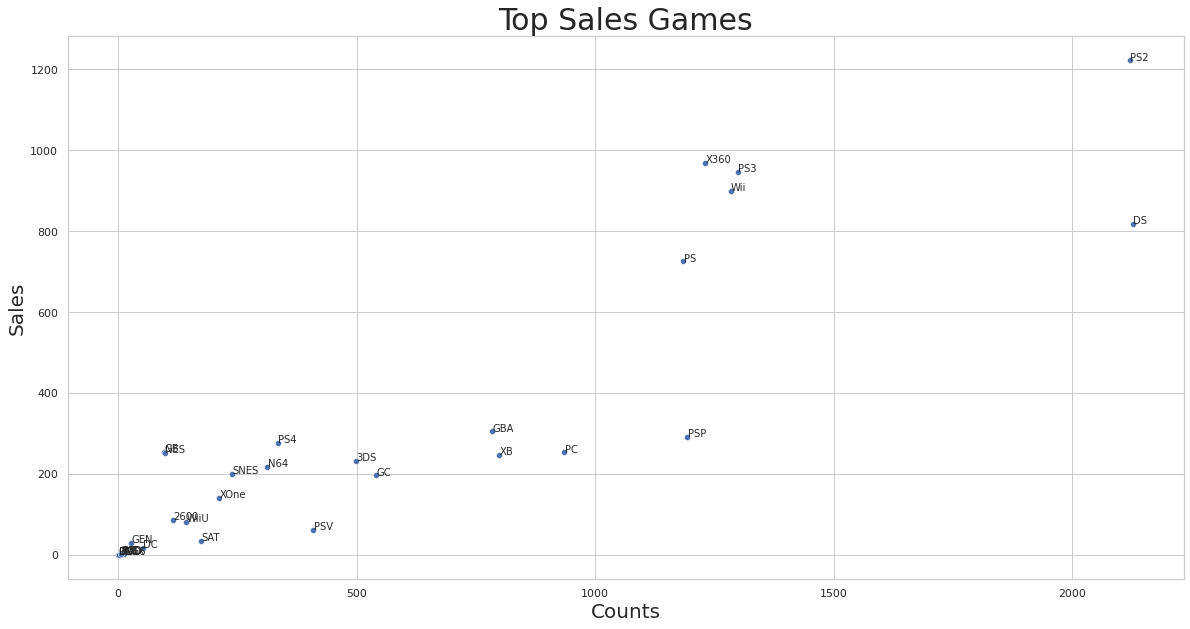

,counts,Global_Sales
counts,1.000000,0.910063
Global_Sales,0.910063,1.000000


In [ ]:
#게임 플랫폼별 개수
#플랫폼을 잘 선택하는 게 매출과 관련있는가

plat_cnt = pd.DataFrame(games.groupby(by=['Platform']).size().reset_index(name='counts'))
plat_sales = pd.DataFrame(games.groupby(by=['Platform'])['Global_Sales'].sum().reset_index())
plat_s_c = pd.merge(plat_cnt, plat_sales, on=['Platform'])

platform = plat_s_c['Platform']
y = np.arange(0, 20)

plt.figure(figsize=(20, 10))
g = sns.scatterplot(x='counts', y='Global_Sales', data=plat_s_c)

for i in range(plat_s_c.shape[0]):
  plt.text(x=plat_s_c.counts[i]+.8,y=plat_s_c.Global_Sales[i]+.8, s=plat_s_c.Platform[i], 
          fontdict=dict(size=10))

plt.title("Top Sales Games", fontsize=30)
plt.xlabel("Counts", fontsize=20)
plt.ylabel("Sales", fontsize=20)

plt.show()

plat_s_c.corr(method='spearman')

#양의 상관관계:0.91, 즉 플랫폼을 잘 선택하는 것도 중요하다.

In [ ]:
#연도별 지역 매출(개별)
drop_year=games['Year'].value_counts()[games['Year'].value_counts()<50].index

for i,v in enumerate(drop_year):
    games=games[games['Year'] != v ]

byYear=games.groupby('Year').sum()

NA=games.groupby('Year')['NA_Sales'].sum()
EU=games.groupby('Year')['EU_Sales'].sum()
JPN=games.groupby('Year')['JP_Sales'].sum()
Other=games.groupby('Year')['Other_Sales'].sum()

for df,(i,j) in zip([JPN,NA,EU,Other],itertools.product(range(2),range(2))):
    ax1=plt.subplot2grid((2,2),(i,j))
    plt.subplots_adjust(hspace=0.8)
    df.plot.bar(ax=ax1,figsize=(20,8))
    ax1.set_title(df.name)

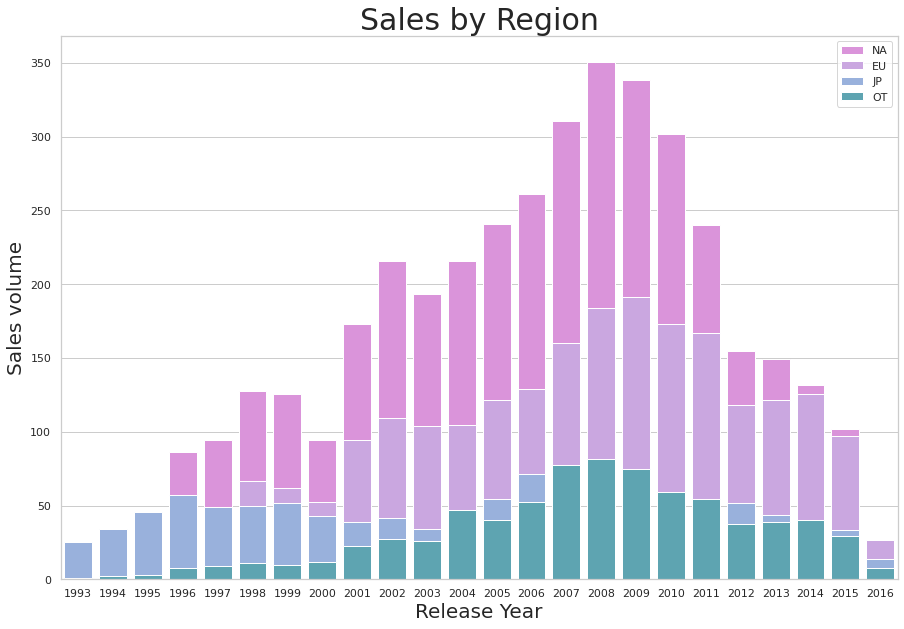

In [28]:
#연도별 지역 매출(누적)
drop_year=games['Year'].value_counts()[games['Year'].value_counts()<50].index

for i,v in enumerate(drop_year):
    games=games[games['Year'] != v ]

byYear=games.groupby('Year').sum()

byYear = byYear[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
byYear = byYear.reset_index()

plt.figure(figsize=(15, 10))
s1 = sns.barplot(x = 'Year', y = 'NA_Sales', data = byYear, color = '#e688e6', label ='NA')
s2 = sns.barplot(x = 'Year', y = 'EU_Sales', data = byYear, color = '#cc9ee9', label ='EU')
s3 = sns.barplot(x = 'Year', y = 'JP_Sales', data = byYear, color = '#8eaee7', label ='JP')
s4 = sns.barplot(x = 'Year', y = 'Other_Sales', data = byYear, color = '#50adbf', label ='OT')

plt.title("Sales by Region", fontsize=30)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Sales volume", fontsize=20)
plt.legend()

In [ ]:
블록체인
메타버스
Play-to-Earn
https://newzoo.com/insights/articles/newzoos-games-trends-to-watch-in-2022-metaverse-game-ip-vr/